In [ ]:
#Importing the important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# sets up matplotlib for the interactive features
%matplotlib notebook
%matplotlib inline


In [ ]:
# loading the dataset
from google.colab import files
files.upload()
df = pd.read_csv("marketing_data.csv")
df.head()
#df=pd.read_csv(r"C:/Users/hp/Desktop/marketing_data.csv")
#df = pd.read_csv("marketing_data.csv")

Saving marketing_data.csv to marketing_data.csv


,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


**Variable Description **

The key variables used in this analysis are summarized below.
*   Income: Annual household income of the customer
*   Education: Highest education level attained by the customer
*   Country: Country of residence of the customer
*   Age: Age of the customer derived from year of birth
*   Kidhome: Number of young children living in the household
*   Teenhome: Number of teenagers living in the household
*   Recency: Number of days since the customer’s last purchase
*   mnt_wines: Amount spent on wine products
*   mnt_fruits: Amount spent on fruit product
*   mnt_meat_products: Amount spent on meat products
*   num_web_visits_month: Number of website visits per month
*   mnt_fish_products: Amount spent on fish products
*   mnt_sweet_products: Amount spent on sweet products
*   mnt_gold_products: Amount spent on gold products
*   num_web_purchases: Number of purchases made through the website
*   num_store_purchases: Number of purchases made in physical stores
*   num_catalog_purchases: Number of purchases made through catalogs
*   num_deals_purchases: Number of purchases made using promotional deals
*   total_spending: Total amount spent across all product categories (derived variable)

In [ ]:
df.describe()

,id,YearBirth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head(10)

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [ ]:
df[df['Income'].isnull()]

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


**DATA CLEANING**

In [ ]:
#Data Cleaning
#checking the null values
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
df.isnull().sum()
#only Income col has null values

,0
id,0
YearBirth,0
Education,0
MaritalStatus,0
Income,24
Kidhome,0
Teenhome,0
DtCustomer,0
Recency,0
MntWines,0


In [ ]:
# Clean Income Column

#taking dollar sign out of values and convert to float
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3625874173.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
df['Income'].head(10)

,Income
0,84835.0
1,57091.0
2,67267.0
3,32474.0
4,21474.0
5,71691.0
6,63564.0
7,44931.0
8,65324.0
9,65324.0


In [ ]:
df[df['Income'].isnull()]

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [ ]:
#Fixing Data Types
df.dtypes

,0
id,int64
YearBirth,int64
Education,object
MaritalStatus,object
Income,float64
Kidhome,int64
Teenhome,int64
DtCustomer,object
Recency,int64
MntWines,int64


In [ ]:
#converting into pandas datetime object
df['DtCustomer'] = pd.to_datetime(df['DtCustomer'], errors='coerce')


/tmp/ipython-input-1085727941.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DtCustomer'] = pd.to_datetime(df['DtCustomer'], errors='coerce')


In [ ]:
#Checking Duplicate Records
df.duplicated().sum()

np.int64(0)

In [ ]:
#Our data has no duplicates.
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,id,YearBirth,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391


In [ ]:
df.head(50
)

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [ ]:
# putting all columns into snake case format
df.columns = [
    re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower()
    for x in df.columns
]

# Check out new names of columns
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')

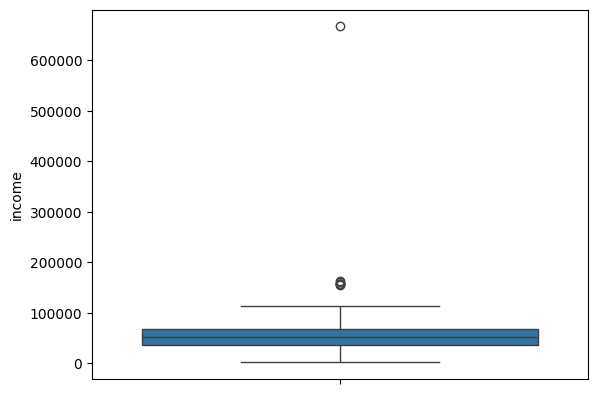

<Figure size 640x480 with 0 Axes>

In [ ]:
#Handling Outliers
#checking for the outliers in the Income column by using boxplot
plt.figure()
sns.boxplot(df["income"])

plt.show()
plt.clf()


*   We have outliers, so we should remove them
*   Instead of a fixed number, using a statistical rule.
*   Percentile-Based Removal

*  
    quantile(0.99) finds the income value below which 99% of customers fall
    upper_limit is that income threshold (e.g., ₹200,000 or similar)




In [ ]:
upper_limit = df['income'].quantile(0.99)
df = df[df['income'] <= upper_limit]

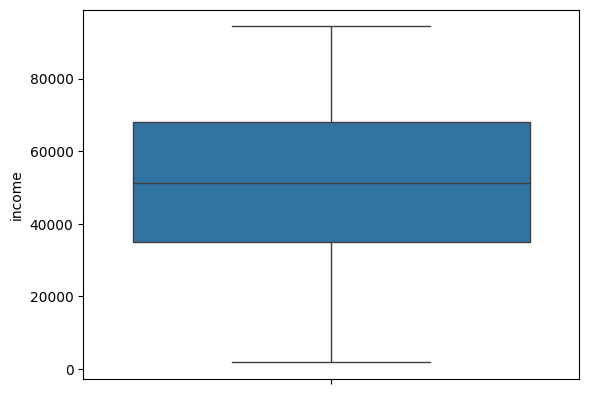

<Figure size 640x480 with 0 Axes>

In [ ]:
# checking if the values are treated well
plt.figure()
sns.boxplot(df["income"])

plt.show()
plt.clf()
# now the outliers are being removed

Income Data Is Skewed

boxplot clearly shows right-skewed income

There are extreme high-income outliers

So we will fill the missing values with the median.


In [ ]:
df['income'] = df['income'].fillna(
   df['income'].median()
)

In [ ]:
df['income'].median()

51111.0

In [ ]:
df[df['income'].isnull()]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,...,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,response,complain,country


The income distribution is right-skewed with extreme high values. The mean is influenced by these outliers,
whereas the median better represents the central tendency. Therefore, median imputation is preferred.

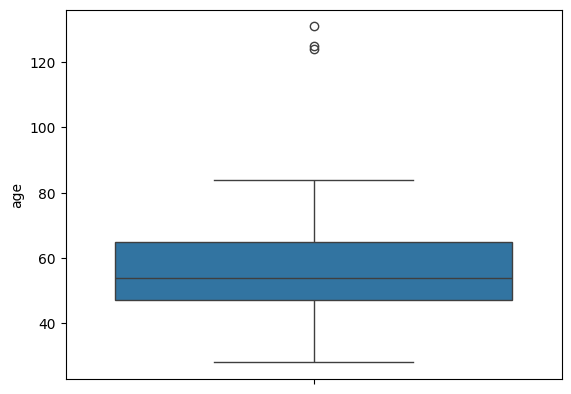

<Figure size 640x480 with 0 Axes>

In [ ]:
# A new column called age is made by subracting each value of year_birth from 2024
df['age'] = 2024 - df['year_birth']

# Check for age outliar
plt.figure()
sns.boxplot(df['age'])
plt.show()
plt.clf()

In [ ]:
df = df[
    (df['age'] > 18) & (df['age'] < 100)
]
'''Removes:
Minors (unlikely customers)
Extremely old values
More logically sound'''

'Removes:\nMinors (unlikely customers)\nExtremely old values\nMore logically sound'

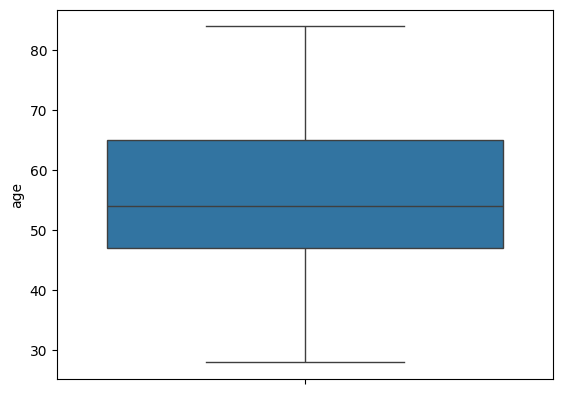

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure()
sns.boxplot(df['age'])
plt.show()
plt.clf()



*   In this boxplot, Q1 ≈ 47 years and Q3 ≈ 65 years.
*   This means 50% of people are between ~47 and ~65 years old.
*   Median ≈ 54 years, half the people are younger than 54, half are older






/tmp/ipython-input-72033010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df["education"], y=df["income"],


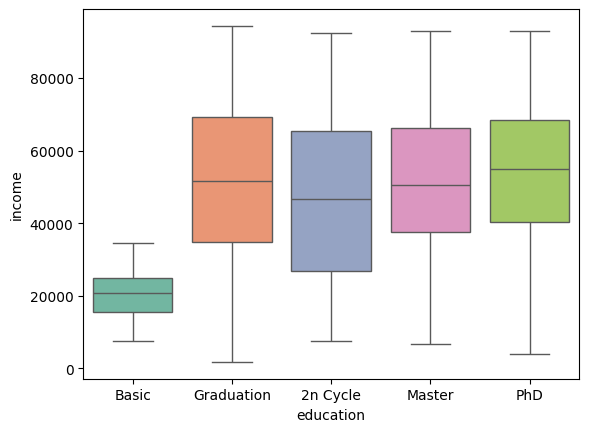

<Figure size 640x480 with 0 Axes>

In [ ]:
#Checking the outliers for Education Variable
plt.figure()
sns.boxplot(x = df["education"], y=df["income"],
            order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"] ,palette="Set2")
plt.show()
plt.clf()

No outliers for the Education Variable

In [ ]:
#Total_Spending represents the total amount of money a customer has spent across all product categories.
df['total_spending'] = (
    df['mnt_wines'] +
    df['mnt_fruits'] +
    df['mnt_meat_products'] +
    df['mnt_fish_products'] +
    df['mnt_sweet_products'] +
    df['mnt_gold_products']
)

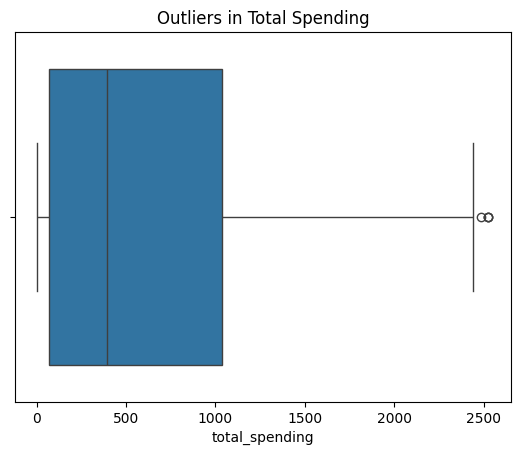

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.figure()
sns.boxplot(x=df['total_spending'])
plt.title('Outliers in Total Spending')
plt.show()
plt.clf()

In [ ]:
# Calculate upper limit (99th percentile)
upper_limit = df['total_spending'].quantile(0.99)

# Remove extreme outliers
df = df[df['total_spending'] <= upper_limit]



Keeps 99% of customers

Removes the top 1% extreme spenders


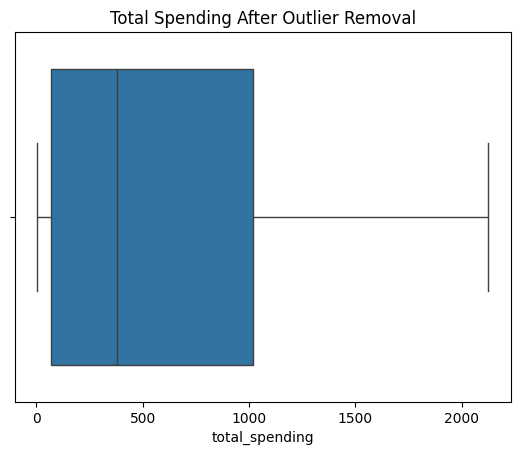

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure()
sns.boxplot(x=df['total_spending'])
plt.title('Total Spending After Outlier Removal')
plt.show()
plt.clf()

Removed all the outliers from the total_spending col.

**Exploratory Data Analysis(EDA)**

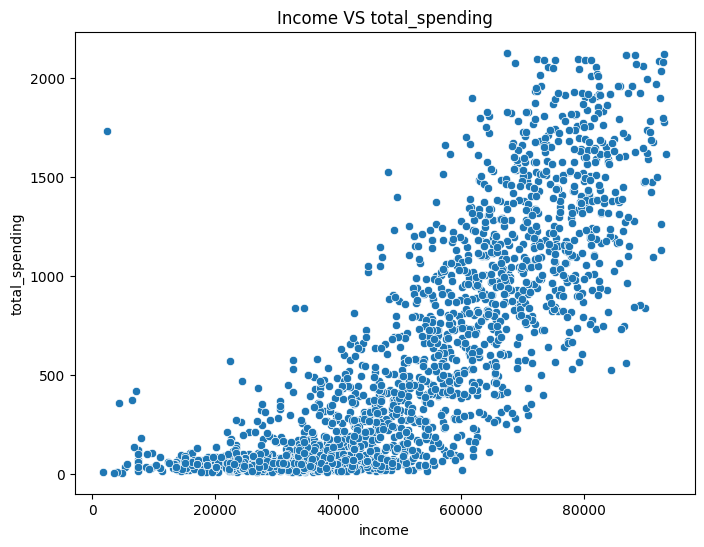

In [ ]:
#Effect of income on the purchasing behavior
plt.figure(figsize=(8,6))
sns.scatterplot(x='income', y='total_spending', data=df)
plt.title("Income VS total_spending")
plt.show()

The above graph shows that high income customers spends more.





/tmp/ipython-input-923175613.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education', y='total_spending', data=df, palette="Set2")


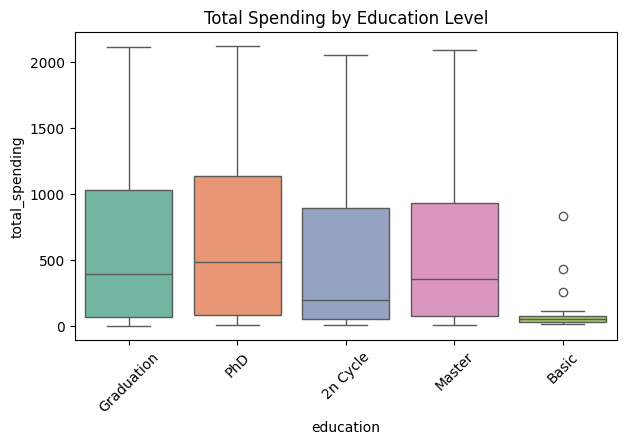

In [ ]:
#Effect of education on purchasing behavior
plt.figure(figsize=(7,4))
sns.boxplot(x='education', y='total_spending', data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title('Total Spending by Education Level')
plt.show()

Graph says positive relationship between education level and total spending.Customers with higher education levels tends to have higher spendings.

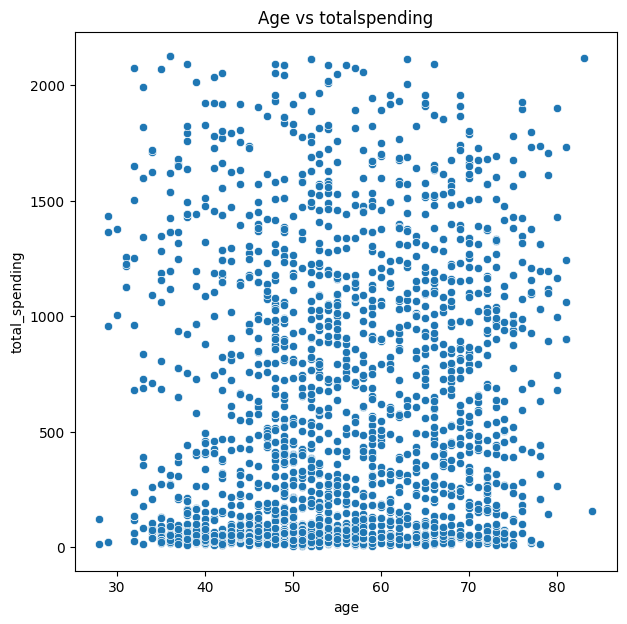

In [ ]:
#Age & purchasing behavior
plt.figure(figsize=(7,7))
sns.scatterplot(x='age',y='total_spending', data=df)
plt.title('Age vs totalspending')
plt.show()

The scatter plot shows high variability in spending across all age groups, indicating no strong direct relationship between age and total spending.

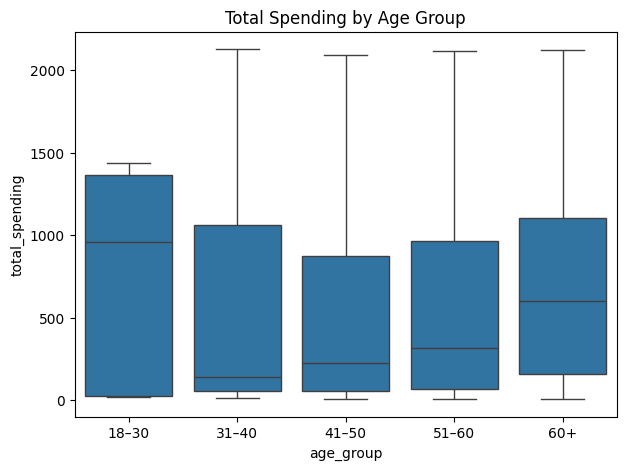

In [ ]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[18, 30, 40, 50, 60, 100],
    labels=['18–30', '31–40', '41–50', '51–60', '60+']
)
plt.figure(figsize=(7,5))
sns.boxplot(x='age_group', y='total_spending', data=df)
plt.title('Total Spending by Age Group')
plt.show()


To better understand the totalspending & age relationship we used the boxplot.
Total spending varies across age groups, with higher median spending observed among the youngest (18–30) and oldest (60+) customers. Middle-aged groups (31–50) show relatively lower median spending, possibly due to greater family responsibilities. However, substantial variability within each group indicates that age alone does not fully determine purchasing behavior.

Country shows some variation in spending, but its impact is weaker compared to demographic and income-related factors.

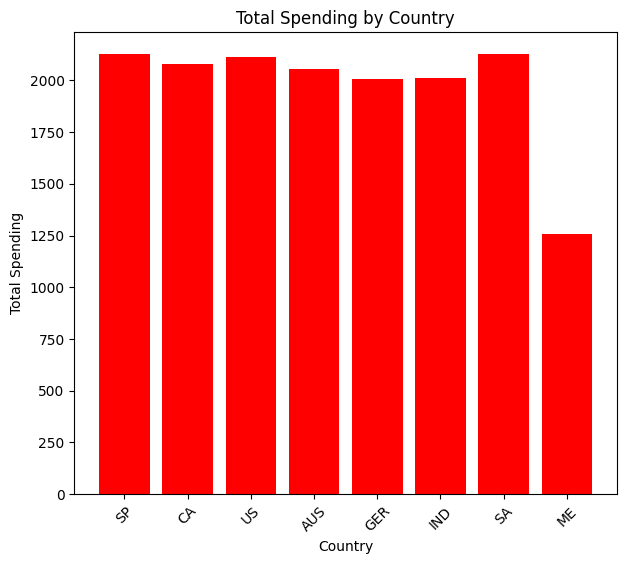

<Figure size 640x480 with 0 Axes>

In [ ]:
# Total spending vs Country
plt.figure(figsize=(7, 6))
plt.bar(df["country"], df["total_spending"], color='red')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Country')
plt.ylabel('Total Spending')
plt.title('Total Spending by Country')

plt.show()
plt.clf()

US made most purchases and ME made the least, but there is not alot of difference between countries.
Spain (SP), Canada (CA), United States (US),
Australia (AUS), Germany (GER), India (IND), Saudi Arabia
(SA), and Montenegro (ME).

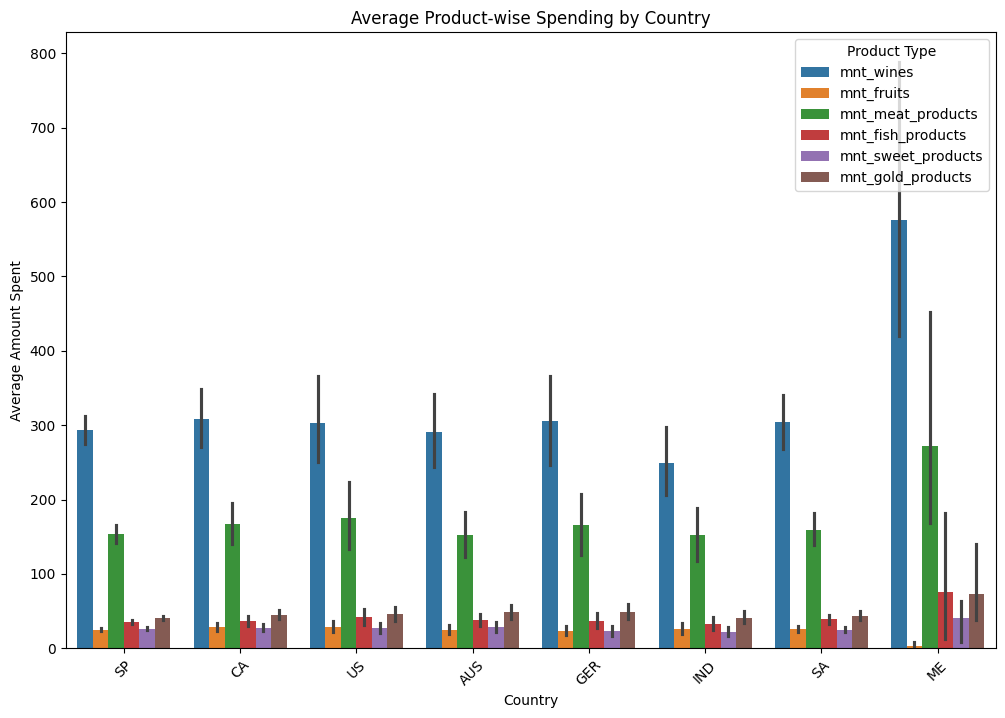

<Figure size 640x480 with 0 Axes>

In [ ]:
#product-wise spending by each country
#Melt the dataframe
marketing_amount = [
    'mnt_wines',
    'mnt_fruits',
    'mnt_meat_products',
    'mnt_fish_products',
    'mnt_sweet_products',
    'mnt_gold_products'
]

melted_data = df.melt(
    id_vars=['country'],
    value_vars=marketing_amount,
    var_name='product_type',
    value_name='amount_spent'
)

plt.figure(figsize=(12, 8))

sns.barplot(
    x='country',
    y='amount_spent',
    hue='product_type',
    data=melted_data,
    estimator='mean'
)

plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Average Amount Spent')
plt.title('Average Product-wise Spending by Country')
plt.legend(title='Product Type', loc='upper right')

plt.show()
plt.clf()



*   Wines have the highest average spending everywhere
*   India (IND) has the lowest spending across categories
*   Fruits & sweets are low-value categories
*   Developed markets (US, CA, GER, AUS) show similar patterns(Moderate to high wine & meat spending)






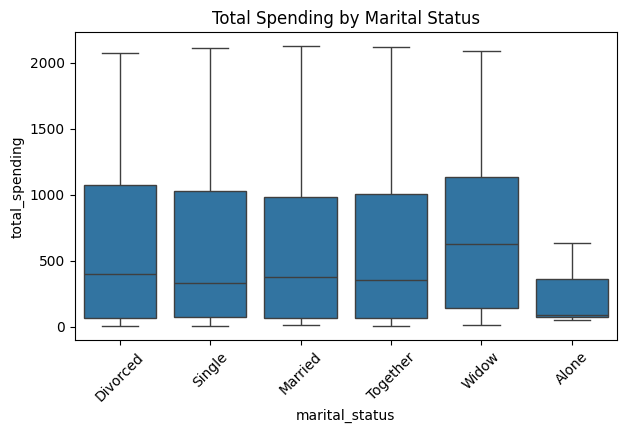

In [ ]:
#Marital Status vs Total Spending
df = df[~df['marital_status'].isin(['YOLO', 'Absurd'])]
plt.figure(figsize=(7,4))
sns.boxplot(x='marital_status', y='total_spending', data=df)
plt.xticks(rotation=45)
plt.title('Total Spending by Marital Status')
plt.show()






*   Married:(Moderate to high spending)Dual-income households increase purchasing power. Presence of children increases essential consumption but limits luxury spending
*   Single:(Moderate spending) Single income limits total purchasing capacity.
Lower household responsibilities reduce essential expenses.
*   Together (Living together)(Spending Similar to married, slightly lower)
they might have shared expenses but often fewer long-term financial commitments.
*   Divorced(Moderate spending with high variability): They might have the resposibily of child-support or alimony obligations. Financial restructuring after divorce affects spending behavior
*   Widow(Highest median spending): Older age group with accumulated wealth or pension income. Stable income sources (pension, savings).
*   Alone(Lower spending): Financial constraints or limited income. Preference for essential goods over discretionary items.

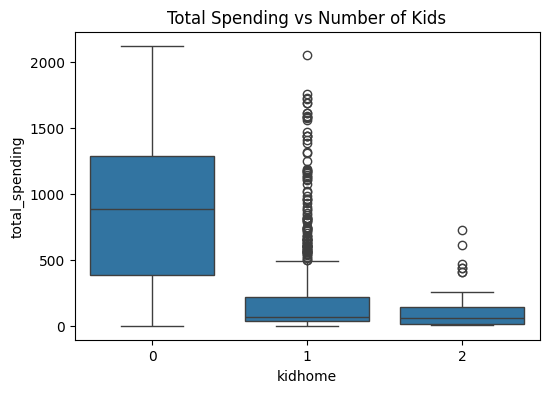

In [ ]:
#Kids at Home vs Total Spending
plt.figure(figsize=(6,4))
sns.boxplot(x='kidhome', y='total_spending', data=df)
plt.title('Total Spending vs Number of Kids')
plt.show()



*   Houses with 0 kids:They have highest median spending. Customers without children might have more isposable income. They can spend more on non-essential and premium products.
*   Houses with 1 kids:drop in median spending comapred to houses with 0 kids.
Because they have slightly more Financial responsibilities due to kid.
*   Houses with 2 kids: This set of people have lowest median spending. This can be because Strong budget constraints. They are maily focused on the essentials.







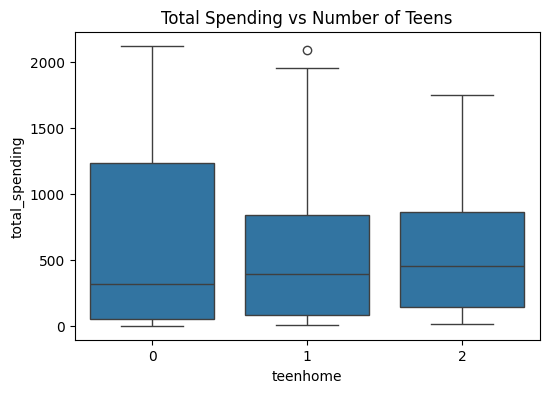

In [ ]:
#Teens at Home vs Total Spending
plt.figure(figsize=(6,4))
sns.boxplot(x='teenhome', y='total_spending', data=df)
plt.title('Total Spending vs Number of Teens')
plt.show()



*   Households with one or two teenagers show a higher median total spending compared to households with no teenagers.
*   Spending variability also increases as the number of teenagers rises, indicating a wider range of purchasing behavior.
*   Teenagers may contribute to increased household expenses such as food, clothing, education, and discretionary items.






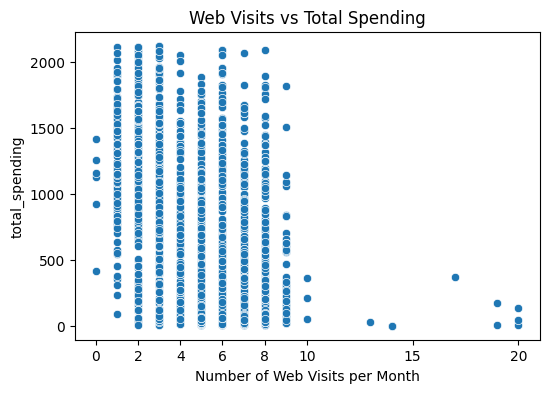

In [ ]:
#Web Visits vs Total Spending
plt.figure(figsize=(6,4))
sns.scatterplot(x='num_web_visits_month', y='total_spending', data=df)

plt.xticks([0, 2, 4, 6, 8, 10, 15, 20])
plt.xlabel('Number of Web Visits per Month')
plt.title('Web Visits vs Total Spending')

plt.show()




* The scatter plot shows no strong positive relationship between monthly web visits and total spending. Customers with very high web visit frequency tend to spend less, suggesting potential browsing or comparison behavior rather than purchase intent.
* Overall, results imply that engagement measured solely by website visits is not a reliable predictor of customer spending.



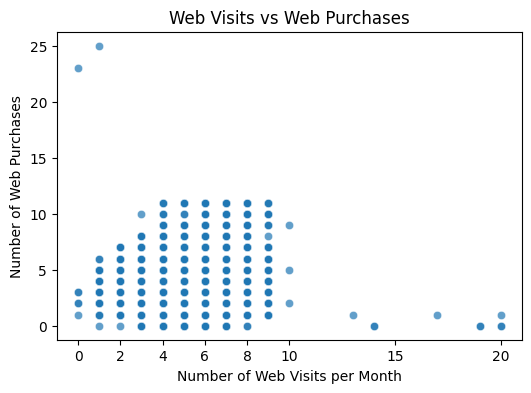

In [ ]:
plt.figure(figsize=(6,4))

sns.scatterplot(
    x='num_web_visits_month',
    y='num_web_purchases',
    data=df,
    alpha=0.7
)

plt.xticks([0, 2, 4, 6, 8, 10, 15, 20])
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Number of Web Purchases')
plt.title('Web Visits vs Web Purchases')

plt.show()




*   The scatter plot shows the relationship between the number of monthly website visits and the number of web purchases made by customers.
*   Customers with moderate website visits tend to make more purchases,may be because as they usually visit with a clear buying intent.
*   Very frequent visitors may be browsing, comparing products, or waiting for discounts, which reduces immediate purchases.
*   High visit frequency with low purchases may also indicate conversion issues such as pricing, checkout complexity, or decision fatigue.






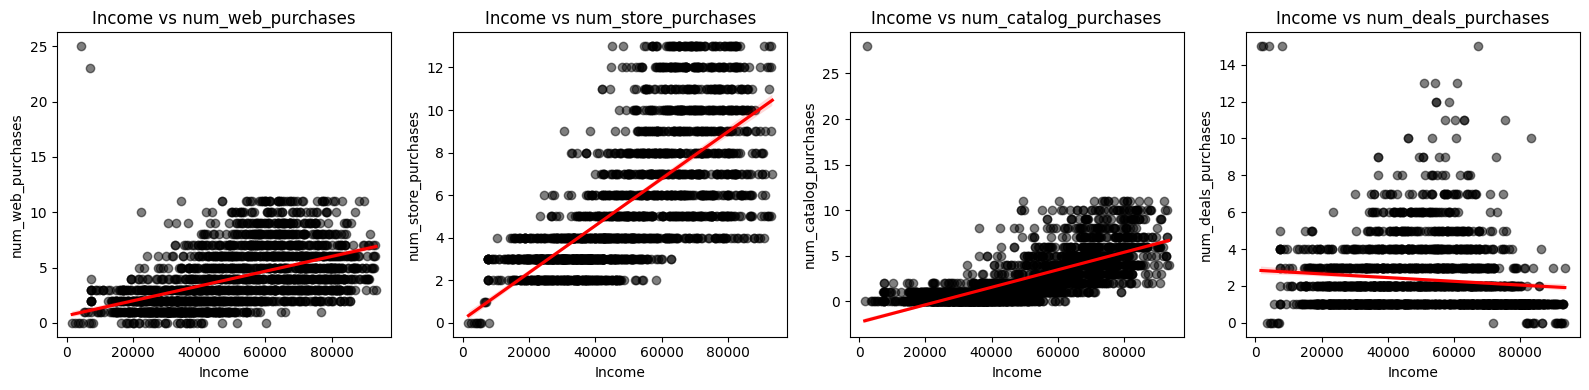

<Figure size 640x480 with 0 Axes>

In [ ]:
#purchasing frequency across online, offline, catalog, and promotional channels
marketing_purchase = [
    'num_web_purchases',
    'num_store_purchases',
    'num_catalog_purchases',
    'num_deals_purchases'
]

fig, axes = plt.subplots(
    nrows=1,
    ncols=len(marketing_purchase),
    figsize=(4 * len(marketing_purchase), 4)
)

for i, purchase in enumerate(marketing_purchase):
    sns.regplot(
        data=df,
        x='income',
        y=purchase,
        ax=axes[i],
        scatter_kws={'color': 'black', 'alpha': 0.5},
        line_kws={'color': 'red'}
    )
    axes[i].set_title(f'Income vs {purchase}')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(purchase)

plt.tight_layout()
plt.show()
plt.clf()



**Income vs Web Purchases**
*  Shows a weak to moderate positive relationship: higher-income customers make slightly more online purchases, may be because higher-income customers may value convenience and time savings offered by online shopping.

**Income vs Store Purchases**
*   Displays a strong positive relationship with income.
*   Physical stores may offer exclusive or higher-value products.
*   Higher-income customers may prefer in-store experiences, premium service, and product assurance.

**Income vs Catalog Purchases**
*   Shows a moderate positive relationship as income increases.
*   Catalog shopping often targets loyal and premium customers.

**Income vs Deal Purchases**
*   Shows little to no positive relationship with income (slightly negative trend).
*   Higher-income customers are generally less price-sensitive.
*   Lower-income customers are more likely to actively seek discounts and promotions.

**Overall Takeaway**
*   As income increases, customers tend to purchase more frequently through store, web, and catalog channels, but rely less on promotional deals.
*   This suggests that purchasing channels and price sensitivity vary significantly with income level.


















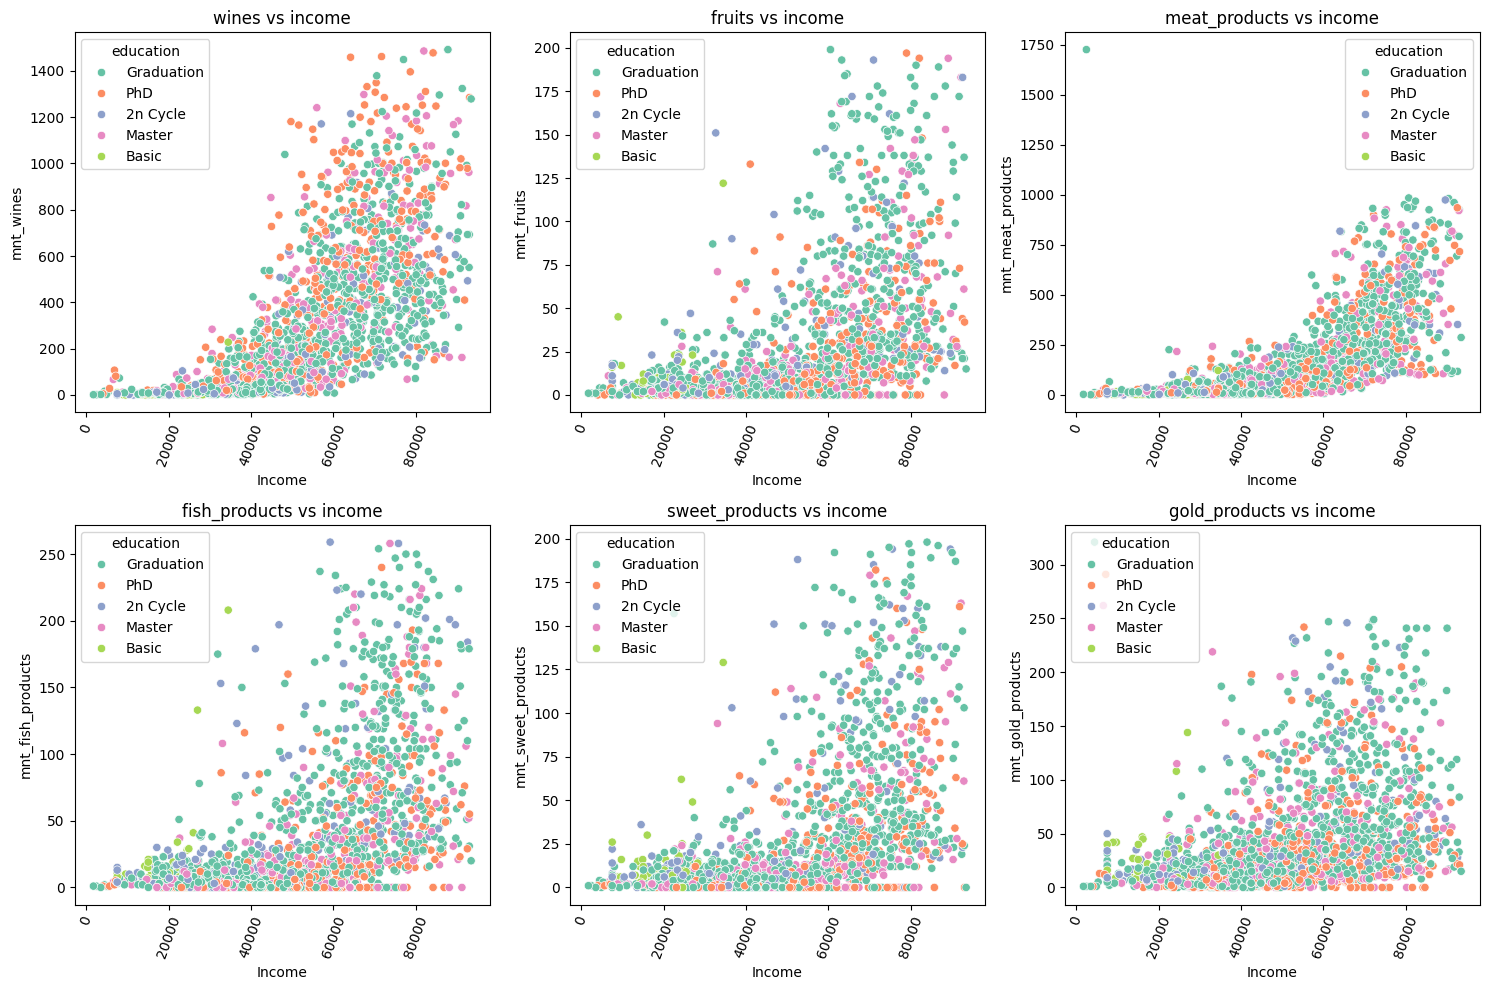

<Figure size 640x480 with 0 Axes>

In [ ]:
#Income, Product Spending, and Education Level
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, amount in enumerate(marketing_amount):
    # Plot scatter plot for each subplot with hue of education
    sns.scatterplot(
        data=df,
        x="income",
        y=amount,
        ax=axes[i],
        hue="education",
        palette="Set2"
    )
    axes[i].set_title(f'{amount[4:]} vs income')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel(amount)
    axes[i].tick_params(axis='x', rotation=70)

# Adjust layout
plt.tight_layout()
plt.show()
plt.clf()



*   Spending increases with income across all product categories, indicating that income is the primary driver of purchasing behavior regardless of product type.

*   Higher-educated customers (Graduation, Master, PhD) are more prevalent at higher spending levels, especially for premium categories like wines, meat, and gold products, suggesting stronger purchasing power and preference for quality.

*   Customers with basic education are mostly concentrated at lower spending levels, even within similar income ranges, indicating more cautious or need-based spending behavior.

*   Wines and meat products show the strongest positive relationship with income, highlighting their nature as premium or discretionary items that scale with purchasing power.

*   Fruits and sweets exhibit a moderate increase with income, with minimal differentiation by education level, suggesting these are largely necessity-driven purchases.

*   Gold products are strongly associated with both high income and high education, reinforcing their role as luxury or selective purchases rather than everyday consumpt

**K-Means Clustering**

In [ ]:
#k-means clusteing
features = [
    'income',
    'recency',
    'mnt_wines',
    'mnt_fruits',
    'mnt_meat_products',
    'mnt_fish_products',
    'mnt_sweet_products',
    'mnt_gold_products',
    'num_web_purchases',
    'num_store_purchases'
]

X = df[features]



Why these features?

*   Income → buying capacity
*   Spending columns → preferences
*   Purchases → behavior






In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Elbow Method
(Elbow methods helps to choose k logically & objectively.)

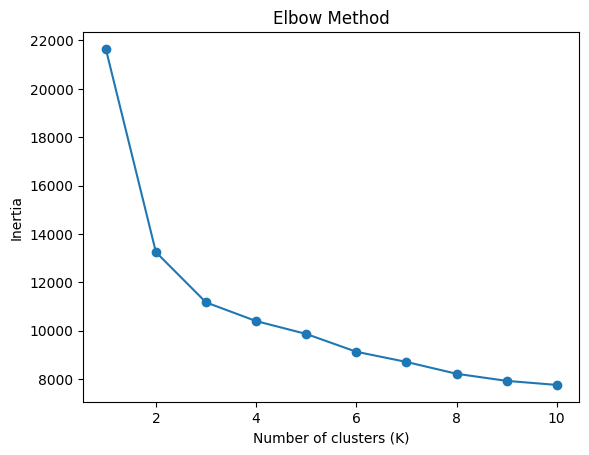

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


We take K = 3 because the Elbow Method shows a clear elbow at K = 3, meaning most of the clustering improvement happens up to that point. At k=3 captures the natural structure of the data effectively.

In [ ]:
#applying K-means
#K = 3 means the dataset is partitioned into three distinct customer groups,
#where each customer belongs to exactly one cluster based on similarity in income and spending behavior.
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
#Analyze the clusters
cluster_summary = df.groupby('cluster')[features].mean()
cluster_summary


,income,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products,num_web_purchases,num_store_purchases
cluster,,,,,,,,,,
0,34810.410497,49.145267,47.421743,5.119963,26.059044,7.427366,5.150890,15.661668,2.188379,3.297095
1,61675.852713,47.716279,529.837209,20.449612,175.392248,31.072868,22.119380,60.387597,6.220155,7.896124
2,73769.677704,50.935982,546.275938,80.909492,441.379691,111.298013,80.615894,82.359823,5.403974,8.600442




*   Cluster 0 – Low-Value Customers
*   Cluster 1 – High-Value Customers
*   Cluster 2 – Moderate Customers






 We clustered customers by measuring the similarity in income,spending & purchasing behavior using k-means, where customers with similar patterns are grouped together based on Euclidean distance.


1.   Customers with avg Income ≈ 34,756, have low Very low spending on all products, very few web & store purchases.
2.   Customers with avg Income ≈ 73,765, have very high spendings on wines,meat products, Fish, sweets, gold. Also High number of purchases (web + store)
3. Customers with avg Income ≈ 60,170 have Lower spending than Cluster 1 but much higher than Cluster 0.
4. Recency is similar across all the clusters, which means Spending behavior & income are stronger segmentation drivers.






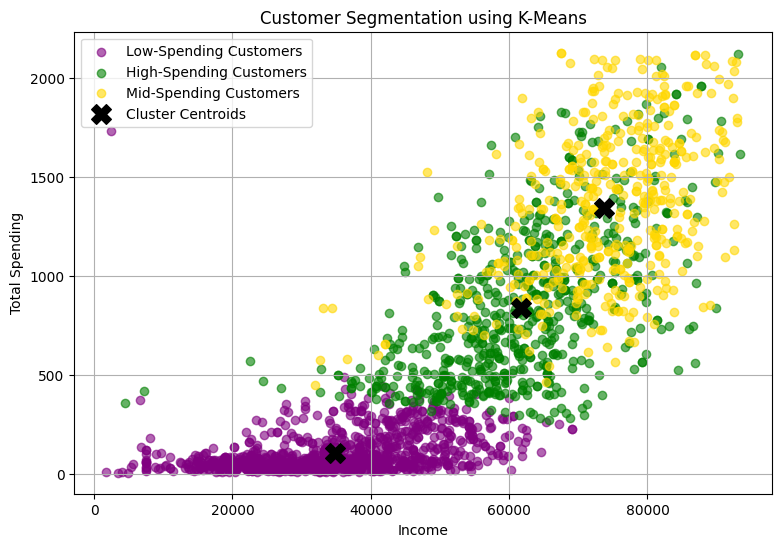

In [ ]:
#Visualize clusters
cluster_labels = {
    0: 'Low-Spending Customers',
    1: 'High-Spending Customers',
    2: 'Mid-Spending Customers'
}

cluster_colors = {
    0: 'purple',
    1: 'green',
    2: 'gold'
}
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

for c in sorted(df['cluster'].unique()):
    subset = df[df['cluster'] == c]
    plt.scatter(
        subset['income'],
        subset['total_spending'],
        color=cluster_colors[c],
        label=cluster_labels[c],
        alpha=0.6
    )
centroids = df.groupby('cluster')[['income', 'total_spending']].mean()

plt.scatter(
    centroids['income'],
    centroids['total_spending'],
    color='black',
    marker='X',
    s=200,
    label='Cluster Centroids'
)
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.grid(True)
plt.show()



*  The plot shows three distinct customer segments where low-spending customers cluster at low total spending, mid-spending customers occupy the middle range, and high-spending customers concentrate at high income and high total spending, with black X markers indicating the average (centroid) of each segment.
*  This segmentation enables data-driven customer targeting and improved marketing decisions.



**Key Conclusions of the Project**

* Income is the strongest driver of the customer spending, with consistent high total across all the product categories.  

*  Low-value customers tend to be more price-sensitive,engagement-focused strategies may be more effective for this group.

*   Customer purchasing behavior varies significantly across segments, and K-Means clustering successfully identified three distinct groups: low-value, mid-value, and high-value customers.

*   High income customers tend to spend more on the premium products like gold, wine and meat.

*   Mid-value customers can be upsold through personalized marketing and targeted promotions.


*   Higher-educated customers more prevalent in higher spending categories, especially for premium products.

*   Moderate website visites leads to higher purchases. Excessive visits does not necessarily means higher sales.

*   Unsupervised learning techniques like K-Means are effective for customer segmentation, to group the customers within the clusters.






